# Sentiment Analysis for Trading

Sheng and Russell created a sentiment analysis program for analysing if one should get into the market on a particular day.  This was done with deep colaboration as the data for analysis was very sparse and preparing the data was very tedious. 

In [200]:
pip install --user alpaca-trade-api

Note: you may need to restart the kernel to use updated packages.


In [201]:
!pip install contractions

In [202]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
from pandas import json_normalize
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [203]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [204]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api_token = os.getenv("API_TOKEN")
url = 'https://api.marketaux.com/v1/news/all?exchanges=INDEXSP&filter_entities=true&limit=10&published_after=2022-10-05T14:16&api_token=lcAhIBLs9tfcJpopUfWISCOEzRhauYLIkOrvQqEb'
endpoint = 'https://newsapi.org/v2/top-headlines?sources=bloomberg&apiKey=5a12720f93484a039f648da076539099'
tickers = ["NDAQ"]
start_date = "2021-01-01"
end_date = "2022-09-29"
rest_client = tradeapi.REST(alpaca_api_key, alpaca_secret_key)
news = rest_client.get_news(tickers, start_date, end_date)
news
r = requests.get(url)
s = requests.get(endpoint)
s

<Response [200]>

In [205]:
#API News was chosen for the channel Bloomberg as this had the most data to work with and the data is more related to financial news

json = s.json()
json

{'status': 'ok',
 'totalResults': 10,
 'articles': [{'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
   'author': None,
   'title': 'Will the iPhone 15 Get USB-C Port? Will Apple (AAPL) Release a Wireless iPhone?',
   'description': '',
   'url': 'https://www.bloomberg.com/news/newsletters/2022-10-09/will-the-iphone-15-get-usb-c-port-will-apple-aapl-release-a-wireless-iphone-l91edtxt',
   'urlToImage': None,
   'publishedAt': '2022-10-09T13:45:11+00:00',
   'content': ''},
  {'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
   'author': None,
   'title': 'Look at That Building: The Goat Heads Rental Homes in Marfa, Texas',
   'description': '',
   'url': 'https://www.bloomberg.com/news/features/2022-10-09/look-at-that-building-the-goat-heads-rental-homes-in-marfa-texas',
   'urlToImage': None,
   'publishedAt': '2022-10-09T12:00:10+00:00',
   'content': ''},
  {'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
   'author': None,
   'title': "Nintendo's Mario Movie May Finally 

In [206]:
json.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [207]:
json['articles']

[{'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
  'author': None,
  'title': 'Will the iPhone 15 Get USB-C Port? Will Apple (AAPL) Release a Wireless iPhone?',
  'description': '',
  'url': 'https://www.bloomberg.com/news/newsletters/2022-10-09/will-the-iphone-15-get-usb-c-port-will-apple-aapl-release-a-wireless-iphone-l91edtxt',
  'urlToImage': None,
  'publishedAt': '2022-10-09T13:45:11+00:00',
  'content': ''},
 {'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
  'author': None,
  'title': 'Look at That Building: The Goat Heads Rental Homes in Marfa, Texas',
  'description': '',
  'url': 'https://www.bloomberg.com/news/features/2022-10-09/look-at-that-building-the-goat-heads-rental-homes-in-marfa-texas',
  'urlToImage': None,
  'publishedAt': '2022-10-09T12:00:10+00:00',
  'content': ''},
 {'source': {'id': 'bloomberg', 'name': 'Bloomberg'},
  'author': None,
  'title': "Nintendo's Mario Movie May Finally Give the Game Franchise a Hollywood Life",
  'description': '',
  'ur

In [208]:
df=pd.DataFrame()

In [209]:
type(json['articles'])

list

In [210]:
df = pd.DataFrame(json['articles'][0].items())
df

,0,1
0,source,"{'id': 'bloomberg', 'name': 'Bloomberg'}"
1,author,None
2,title,Will the iPhone 15 Get USB-C Port? Will Apple ...
3,description,
4,url,https://www.bloomberg.com/news/newsletters/202...
5,urlToImage,None
6,publishedAt,2022-10-09T13:45:11+00:00
7,content,


In [211]:
#Piecing the dataframe together
df_total=pd.DataFrame()
n=0
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_total
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_total
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_total
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1
df_total
df_new = pd.DataFrame(json['articles'][n].items())
df_new = df_new.T
df_new.columns = df_new.iloc[0]
df_new = df_new.drop(0)
df_new = df_new.set_index('publishedAt')
df_total = pd.concat([df_total, df_new])
n = n+1


df_total

,source,author,title,description,url,urlToImage,content
publishedAt,,,,,,,
2022-10-09T13:45:11+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Will the iPhone 15 Get USB-C Port? Will Apple ...,,https://www.bloomberg.com/news/newsletters/202...,None,
2022-10-09T12:00:10+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Look at That Building: The Goat Heads Rental H...,,https://www.bloomberg.com/news/features/2022-1...,None,
2022-10-07T20:07:11+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Nintendo's Mario Movie May Finally Give the Ga...,,https://www.bloomberg.com/news/newsletters/202...,None,
2022-10-07T14:29:19+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,CVS Is in Exclusive Talks to Buy Cano Health,,https://www.bloomberg.com/news/articles/2022-1...,None,
2022-10-07T09:00:10+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,The Weekly Fix: Shouting Down the Fed Pivot; P...,,https://www.bloomberg.com/news/newsletters/202...,None,
2022-10-07T04:15:50+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Climate-Driven Disasters Fuel Calls For Wealth...,,https://www.bloomberg.com/graphics/2022-pakist...,None,
2022-10-07T04:00:00+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Used Cars in Pakistan's Unusual Market Keep Ga...,,https://www.bloomberg.com/news/features/2022-1...,None,
2022-10-07T00:00:00+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Fed Officials Keep Hammering Hawkish Message o...,,https://www.bloomberg.com/news/articles/2022-1...,None,
2022-10-06T13:00:13+00:00,"{'id': 'bloomberg', 'name': 'Bloomberg'}",None,Nobel Prize for Chemistry Goes to Carolyn Bert...,,https://www.bloomberg.com/opinion/articles/202...,None,


In [212]:
start_date = pd.Timestamp("2022-10-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-09", tz="America/New_York").isoformat()
timeframe=timeframe = "1Hour"
portfolio_prices_df = rest_client.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
portfolio_prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-04 13:00:00+00:00,58.9100,59.840,58.9100,59.810,274267,3738,59.459917,NDAQ
2022-10-04 14:00:00+00:00,59.8400,59.970,59.5400,59.700,163769,3962,59.702599,NDAQ
2022-10-04 15:00:00+00:00,59.7300,59.860,59.4677,59.560,125627,3356,59.686079,NDAQ
2022-10-04 16:00:00+00:00,59.5800,59.940,59.5500,59.600,101029,2342,59.763669,NDAQ
2022-10-04 17:00:00+00:00,59.6100,59.630,59.1900,59.560,121566,2864,59.404881,NDAQ
2022-10-04 18:00:00+00:00,59.5750,59.680,59.3900,59.620,105848,2587,59.528229,NDAQ
2022-10-04 19:00:00+00:00,59.6300,59.910,59.4500,59.910,379171,8038,59.748566,NDAQ
2022-10-04 20:00:00+00:00,59.9000,59.900,59.9000,59.900,528289,56,59.900000,NDAQ
2022-10-05 12:00:00+00:00,59.0300,59.030,59.0300,59.030,100,1,59.030000,NDAQ


In [213]:
portfolio_prices_df = portfolio_prices_df.between_time('13:00:00','14:00:00',include_end=True)

In [214]:
portfolio_prices_df['Return'] = portfolio_prices_df["close"].pct_change().fillna(0)
portfolio_prices_df['Return'] = 3* portfolio_prices_df['Return'].at_time('14:00:00')

portfolio_prices_df=portfolio_prices_df.dropna()
portfolio_prices_df

C:\Users\Russell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Russell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,open,high,low,close,volume,trade_count,vwap,symbol,Return
timestamp,,,,,,,,,
2022-10-04 14:00:00+00:00,59.84,59.970,59.54,59.70,163769,3962,59.702599,NDAQ,-0.005517
2022-10-05 14:00:00+00:00,59.57,59.610,59.06,59.12,236764,4581,59.326633,NDAQ,-0.022662
2022-10-06 14:00:00+00:00,60.18,60.185,59.63,60.10,147704,3112,59.964128,NDAQ,-0.003490
2022-10-07 14:00:00+00:00,58.13,58.540,58.05,58.30,184496,4130,58.369821,NDAQ,0.011364


In [215]:
min_return = 0.01
portfolio_prices_df['Abs_Return'] = abs(portfolio_prices_df['Return'])
portfolio_prices_df['Position']=0
portfolio_prices_df['Position'].values[portfolio_prices_df['Abs_Return']>=min_return]=1
portfolio_prices_df['Position'].values[portfolio_prices_df['Abs_Return']<min_return]=0
portfolio_prices_df


,open,high,low,close,volume,trade_count,vwap,symbol,Return,Abs_Return,Position
timestamp,,,,,,,,,,,
2022-10-04 14:00:00+00:00,59.84,59.970,59.54,59.70,163769,3962,59.702599,NDAQ,-0.005517,0.005517,0
2022-10-05 14:00:00+00:00,59.57,59.610,59.06,59.12,236764,4581,59.326633,NDAQ,-0.022662,0.022662,1
2022-10-06 14:00:00+00:00,60.18,60.185,59.63,60.10,147704,3112,59.964128,NDAQ,-0.003490,0.003490,0
2022-10-07 14:00:00+00:00,58.13,58.540,58.05,58.30,184496,4130,58.369821,NDAQ,0.011364,0.011364,1


In [216]:
df_total.index.names = ['timestamp']
portfolio_prices_df = portfolio_prices_df.drop(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap','symbol','Return','Abs_Return'], axis=1)
df_total=df_total.reset_index()
df_total['timestamp'] = pd.to_datetime(df_total['timestamp'], errors='coerce')
df_total['timestamp'] = df_total['timestamp'].dt.strftime('%m/%d/%Y')

portfolio_prices_df = portfolio_prices_df.reset_index()
portfolio_prices_df['timestamp'] = pd.to_datetime(portfolio_prices_df['timestamp'], errors='coerce')
portfolio_prices_df['timestamp'] = portfolio_prices_df['timestamp'].dt.strftime('%m/%d/%Y')
portfolio_prices_df


,timestamp,Position
0,10/04/2022,0
1,10/05/2022,1
2,10/06/2022,0
3,10/07/2022,1


In [217]:
df_headline =  pd.merge(df_total, portfolio_prices_df, on=['timestamp'], how='outer')

In [218]:
df_headline = df_headline.drop(['source', 'author', 'description', 'url', 'urlToImage', 'content'], axis=1)
df_headline

,timestamp,title,Position
0,10/09/2022,Will the iPhone 15 Get USB-C Port? Will Apple ...,NaN
1,10/09/2022,Look at That Building: The Goat Heads Rental H...,NaN
2,10/07/2022,Nintendo's Mario Movie May Finally Give the Ga...,1.0
3,10/07/2022,CVS Is in Exclusive Talks to Buy Cano Health,1.0
4,10/07/2022,The Weekly Fix: Shouting Down the Fed Pivot; P...,1.0
5,10/07/2022,Climate-Driven Disasters Fuel Calls For Wealth...,1.0
6,10/07/2022,Used Cars in Pakistan's Unusual Market Keep Ga...,1.0
7,10/07/2022,Fed Officials Keep Hammering Hawkish Message o...,1.0
8,10/06/2022,Nobel Prize for Chemistry Goes to Carolyn Bert...,0.0
9,10/05/2022,Liz Truss's Enemies Worked the Room While She ...,1.0


In [219]:
df_headline=df_headline.dropna()

In [220]:
df_headline=df_headline.set_index(['timestamp'])

In [221]:
df_headline

,title,Position
timestamp,,
10/07/2022,Nintendo's Mario Movie May Finally Give the Ga...,1.0
10/07/2022,CVS Is in Exclusive Talks to Buy Cano Health,1.0
10/07/2022,The Weekly Fix: Shouting Down the Fed Pivot; P...,1.0
10/07/2022,Climate-Driven Disasters Fuel Calls For Wealth...,1.0
10/07/2022,Used Cars in Pakistan's Unusual Market Keep Ga...,1.0
10/07/2022,Fed Officials Keep Hammering Hawkish Message o...,1.0
10/06/2022,Nobel Prize for Chemistry Goes to Carolyn Bert...,0.0
10/05/2022,Liz Truss's Enemies Worked the Room While She ...,1.0


In [222]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df_headline['title'] = df_headline['title'].apply(lambda x: replace_contractions(x))
df_headline

,title,Position
timestamp,,
10/07/2022,Nintendo's Mario Movie May Finally Give the Ga...,1.0
10/07/2022,CVS Is in Exclusive Talks to Buy Cano Health,1.0
10/07/2022,The Weekly Fix: Shouting Down the Fed Pivot; P...,1.0
10/07/2022,Climate-Driven Disasters Fuel Calls For Wealth...,1.0
10/07/2022,Used Cars in Pakistan's Unusual Market Keep Ga...,1.0
10/07/2022,Fed Officials Keep Hammering Hawkish Message o...,1.0
10/06/2022,Nobel Prize for Chemistry Goes to Carolyn Bert...,0.0
10/05/2022,Liz Truss's Enemies Worked the Room While She ...,1.0


In [223]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df_headline['title'] = df_headline['title'].apply(lambda x: remove_numbers(x))

df_headline

,title,Position
timestamp,,
10/07/2022,Nintendo's Mario Movie May Finally Give the Ga...,1.0
10/07/2022,CVS Is in Exclusive Talks to Buy Cano Health,1.0
10/07/2022,The Weekly Fix: Shouting Down the Fed Pivot; P...,1.0
10/07/2022,Climate-Driven Disasters Fuel Calls For Wealth...,1.0
10/07/2022,Used Cars in Pakistan's Unusual Market Keep Ga...,1.0
10/07/2022,Fed Officials Keep Hammering Hawkish Message o...,1.0
10/06/2022,Nobel Prize for Chemistry Goes to Carolyn Bert...,0.0
10/05/2022,Liz Truss's Enemies Worked the Room While She ...,1.0


In [224]:
df_headline['title'] = df_headline.apply(lambda row: nltk.word_tokenize(row['title']), axis=1) # Tokenization of data

In [225]:
df_headline

,title,Position
timestamp,,
10/07/2022,"[Nintendo, 's, Mario, Movie, May, Finally, Giv...",1.0
10/07/2022,"[CVS, Is, in, Exclusive, Talks, to, Buy, Cano,...",1.0
10/07/2022,"[The, Weekly, Fix, :, Shouting, Down, the, Fed...",1.0
10/07/2022,"[Climate-Driven, Disasters, Fuel, Calls, For, ...",1.0
10/07/2022,"[Used, Cars, in, Pakistan, 's, Unusual, Market...",1.0
10/07/2022,"[Fed, Officials, Keep, Hammering, Hawkish, Mes...",1.0
10/06/2022,"[Nobel, Prize, for, Chemistry, Goes, to, Carol...",0.0
10/05/2022,"[Liz, Truss, 's, Enemies, Worked, the, Room, W...",1.0


In [226]:
#Setup to remove stopwords

import nltk
nltk.download('stopwords')      #Downloading nltk corpus

         

stopwords = stopwords.words('english')          

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [227]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    return ' '.join(words)

df_headline['title'] = df_headline['title'].apply(lambda x: remove_non_ascii(x))  #Remove Non-ASCII Characters
df_headline['title'] = df_headline['title'].apply(lambda x: to_lowercase(x))  #Remove Uppercase Characters
df_headline['title'] = df_headline['title'].apply(lambda x: remove_punctuation(x))  #Remove Punctuation
df_headline['title'] = df_headline['title'].apply(lambda x: remove_stopwords(x))  #Remove Stop words
#df_headline['title'] = df_headline['title'].apply(lambda x: lemmatize_list(x)) #Lemmatize words
df_headline

,title,Position
timestamp,,
10/07/2022,"[nintendo, mario, movie, may, finally, give, g...",1.0
10/07/2022,"[cvs, exclusive, talks, buy, cano, health]",1.0
10/07/2022,"[weekly, fix, shouting, fed, pivot, powell, ve...",1.0
10/07/2022,"[climatedriven, disasters, fuel, calls, wealth...",1.0
10/07/2022,"[used, cars, pakistan, unusual, market, keep, ...",1.0
10/07/2022,"[fed, officials, keep, hammering, hawkish, mes...",1.0
10/06/2022,"[nobel, prize, chemistry, goes, carolyn, berto...",0.0
10/05/2022,"[liz, truss, enemies, worked, room, huddled, c...",1.0


In [228]:
cloud = df_headline.copy()
cloud['title'] = cloud['title'].apply(lambda x: normalize(x)) #Joining words back together

In [229]:
cloud

,title,Position
timestamp,,
10/07/2022,nintendo mario movie may finally give game fra...,1.0
10/07/2022,cvs exclusive talks buy cano health,1.0
10/07/2022,weekly fix shouting fed pivot powell versus opec,1.0
10/07/2022,climatedriven disasters fuel calls wealthy nat...,1.0
10/07/2022,used cars pakistan unusual market keep gaining...,1.0
10/07/2022,fed officials keep hammering hawkish message r...,1.0
10/06/2022,nobel prize chemistry goes carolyn bertozzi ro...,0.0
10/05/2022,liz truss enemies worked room huddled crisis,1.0


In [230]:
df_headline.to_csv('headline_data.csv', index=True)

### WARNING!
Not enough data to actually have meaningful analysis.  The analysis is performed anyway as more data can be aquired over time.  The results should not be taken seriously and one should pay attention to how the analysis is performed instead.

In [231]:


import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data.astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

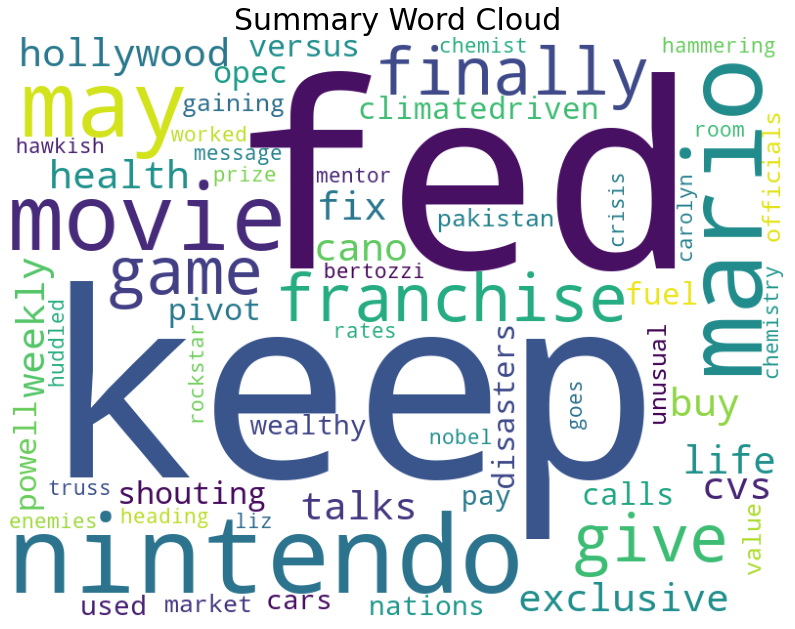

In [232]:
show_wordcloud(cloud["title"],'Summary Word Cloud')

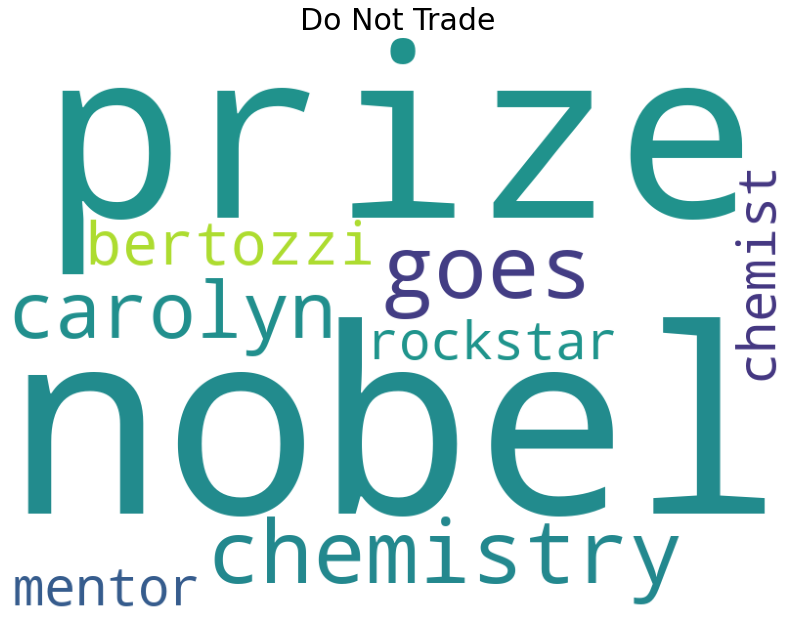

In [233]:
negative_df = cloud[cloud['Position'] != 1.0]
show_wordcloud(negative_df["title"], title="Do Not Trade")

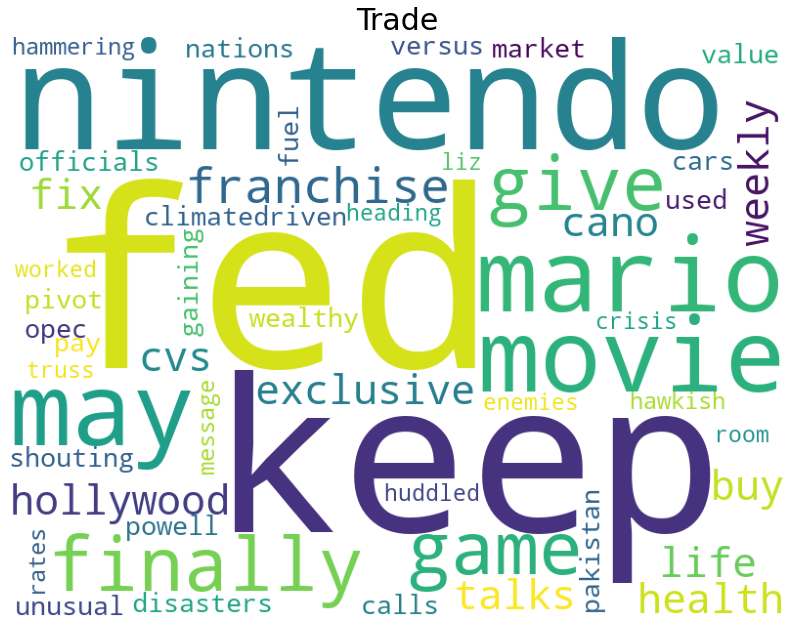

In [234]:
positive_df=cloud[cloud['Position'] == 1.0]
show_wordcloud(positive_df["title"], title = "Trade")

In [168]:
# Vectorization (Convert text data to numbers).
df_headline['title']=[" ".join(text) for text in df_headline['title'].values] #To make sure input is not a list
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(stop_words=None)                # Keep only 2000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df_headline['title'])

data_features = data_features.toarray()                        # Convert the data features to array.



In [169]:
data_features.shape

(8, 62)

In [170]:
df_headline['Position'] = df_headline['Position'].astype('int')
labels = df_headline['Position']
df_headline['Position'].values

array([1, 1, 1, 1, 1, 0, 0, 1])

In [171]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [175]:
# Using Random Forest to build model for the classification of headlines.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=3, n_jobs=1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=2)))

RandomForestClassifier(n_estimators=3, n_jobs=1)
0.75


In [182]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 8)]
base_ln

[1, 2, 3, 4, 5, 6, 7]

In [183]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 4, scoring = 'accuracy')
    cv_scores.append(scores.mean())

C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning:

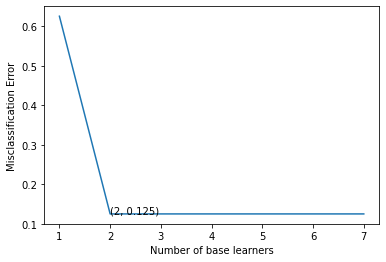

In [184]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [185]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6666666666666666

In [186]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[0 1]
 [0 2]]
0.6666666666666666


<AxesSubplot:>

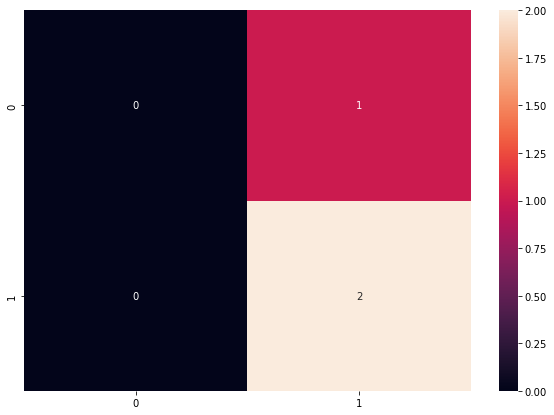

In [188]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### Interpretation

Here, we can see that the number of estimators really swung the error.  This is because of the sparse data.  It is impossible to see at this stage if noise is being captured vs something meaningful.  However, we were able to show that one could find the optimal number of estimators to narrow down on words that coincide with market trends.

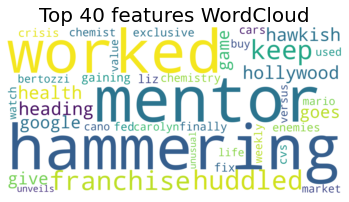

In [189]:


all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

The top 40 most important words affecting the data.

In [190]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(df_headline['title'])

data_features = data_features.toarray()

data_features.shape

(8, 62)

In [191]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [192]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)


C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.8


In [194]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 4, scoring = 'accuracy')
    cv_scores.append(scores.mean())

C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Russell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning:

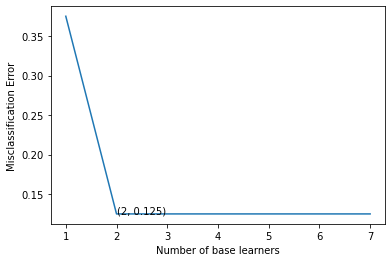

In [195]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [196]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6666666666666666

In [197]:
result = clf.predict(X_test)

[[0 1]
 [0 2]]
0.6666666666666666


<AxesSubplot:>

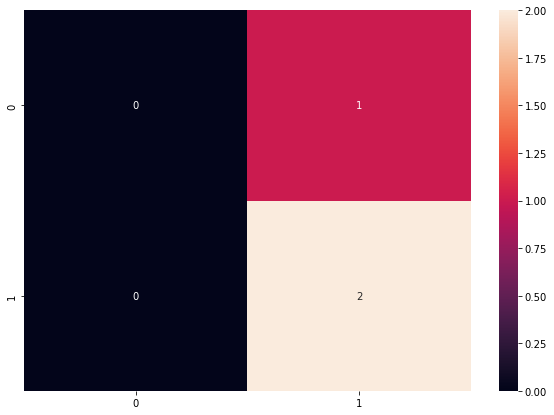

In [198]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

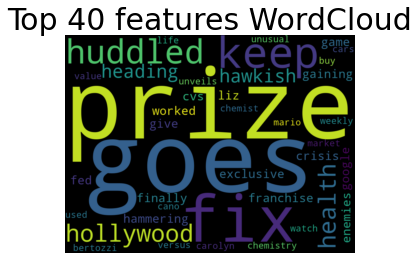

In [199]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

The analysis above was to show that the words can be prioritzed by frequency and rarity.  This weighs how important words will affect the decision as some words capture the market trends better.  However, since the data is so small, the weights will not be accurate and it was shown that it has the same affect as not weighing (as expected due to the small set).  This portion of the project at least demonstrated that making a sentiment analysis is possible and the same program can be run once more data is collected.